In [2]:
import os
import cv2
import numpy as np
import joblib
import json
import pywt
import matplotlib.pyplot as plt

In [3]:
with open('../config.json') as file:
    config = dict(json.load(file))

In [4]:
def EncodeNames(name):
    for key, item in enumerate(config['members']):
        if item == name:
            return (key+1)


EncodeNames("hammad")

3

In [5]:
def extract_facial_features(image, mode='haar', level=1):
    img_array = image

    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

    img_array = np.float32(img_array)

    img_array /= 255

    coeffs = pywt.wavedec2(img_array, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    img_array_H = pywt.waverec2(coeffs_H, mode)
    img_array_H *= 255
    img_array_H = np.uint8(img_array_H)

    return img_array_H

In [6]:
def MakeDataset():
    features = []
    labels = []

    for key in config['members']:
        for i in os.listdir(config['save_to'][key]):
            image_path = os.path.join(config['save_to'][key], i)

            f = extract_facial_features(
                cv2.imread(image_path), 'db1', 3
            )
            features.append(np.array(f).flatten())
            labels.append(EncodeNames(key))

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

In [9]:
features, labels = MakeDataset()

In [10]:
os.makedirs(f"{config['dataset_dir']}/", exist_ok=True)

joblib.dump(features, f"{config['dataset_dir']}/features.joblib")
joblib.dump(labels, f"{config['dataset_dir']}/labels.joblib")

['..\\saved\\dataset/labels.joblib']

In [31]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,

In [26]:
img = extract_facial_features(cv2.imread(
    "../data/hammad/frame_5_face_1.png"), 'db1', 3)
img

array([[254,   0,   0, ...,   0,   1,   2],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 254,   0, ...,   0,   0,   0],
       ...,
       [  0,   1, 255, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

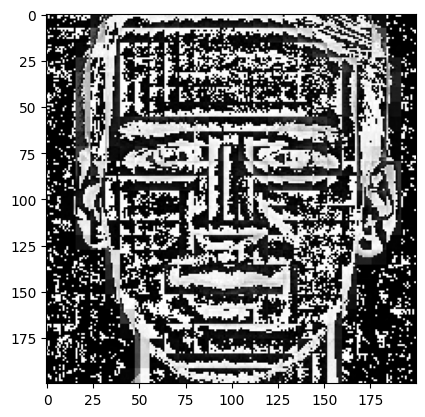

In [27]:
plt.imshow(img, cmap='gray')

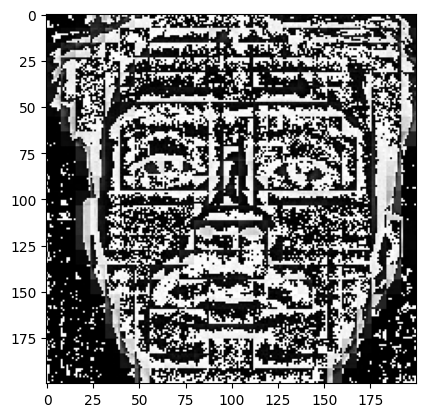

In [29]:
img = extract_facial_features(cv2.imread(
    "../data/ahad/frame_5_face_1.png"), 'db1', 3)

plt.imshow(img, cmap='gray')

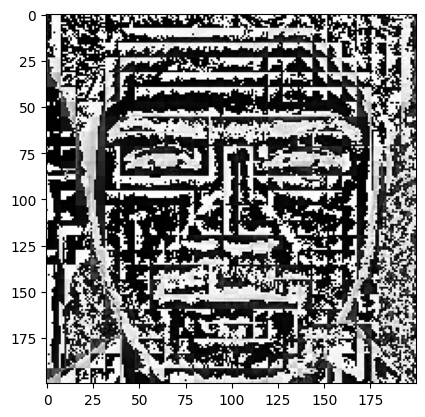

In [7]:
img = extract_facial_features(cv2.imread(
    "../data/ahmad/frame_5_face_1.png"), 'db1', 3)

plt.imshow(img, cmap='gray')

In [6]:
config['save_to'][key]

'..\\data\\hammad\\'